# Covid Cases Prediction

In [178]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime
from statsmodels.tsa.arima.model import ARIMA

In [82]:
#Loading Data from W.H.O API
daily_data = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])

In [83]:
daily_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
180115,2022-01-27,ZW,Zimbabwe,AFRO,167,228943,5,5321
180116,2022-01-28,ZW,Zimbabwe,AFRO,153,229096,3,5324
180117,2022-01-29,ZW,Zimbabwe,AFRO,237,229333,9,5333
180118,2022-01-30,ZW,Zimbabwe,AFRO,82,229415,0,5333


In [84]:
#Sorting based on the date, in reverese chronological order
daily_data.sort_values(by='Date_reported', ascending=True, inplace=True)
daily_data.reset_index(drop=True, inplace=True)

In [85]:
daily_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-03,SA,Saudi Arabia,EMRO,0,0,0,0
2,2020-01-03,HR,Croatia,EURO,0,0,0,0
3,2020-01-03,SY,Syrian Arab Republic,EMRO,0,0,0,0
4,2020-01-03,NL,Netherlands,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
180115,2022-01-31,VC,Saint Vincent and the Grenadines,AMRO,0,7903,0,93
180116,2022-01-31,CU,Cuba,AMRO,0,1039842,7,8397
180117,2022-01-31,WS,Samoa,WPRO,3,32,0,0
180118,2022-01-31,CZ,Czechia,EURO,23914,3013454,12,37209


In [86]:
#filtering only UK data
uk_data = daily_data[daily_data['Country'] == 'The United Kingdom']
uk_data.reset_index(drop=True, inplace=True)

In [87]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
755,2022-01-27,GB,The United Kingdom,EURO,101603,16149323,346,154702
756,2022-01-28,GB,The United Kingdom,EURO,96155,16245478,338,155040
757,2022-01-29,GB,The United Kingdom,EURO,88506,16333984,277,155317
758,2022-01-30,GB,The United Kingdom,EURO,72143,16406127,296,155613


In [88]:
#splitting date into day, month and year
uk_data['Day'] = uk_data['Date_reported'].dt.day
uk_data['Month'] = uk_data['Date_reported'].dt.month
uk_data['Year'] = uk_data['Date_reported'].dt.year

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/1273473612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Day'] = uk_data['Date_reported'].dt.day
/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/1273473612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Month'] = uk_data['Date_reported'].dt.month
/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/1273473612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

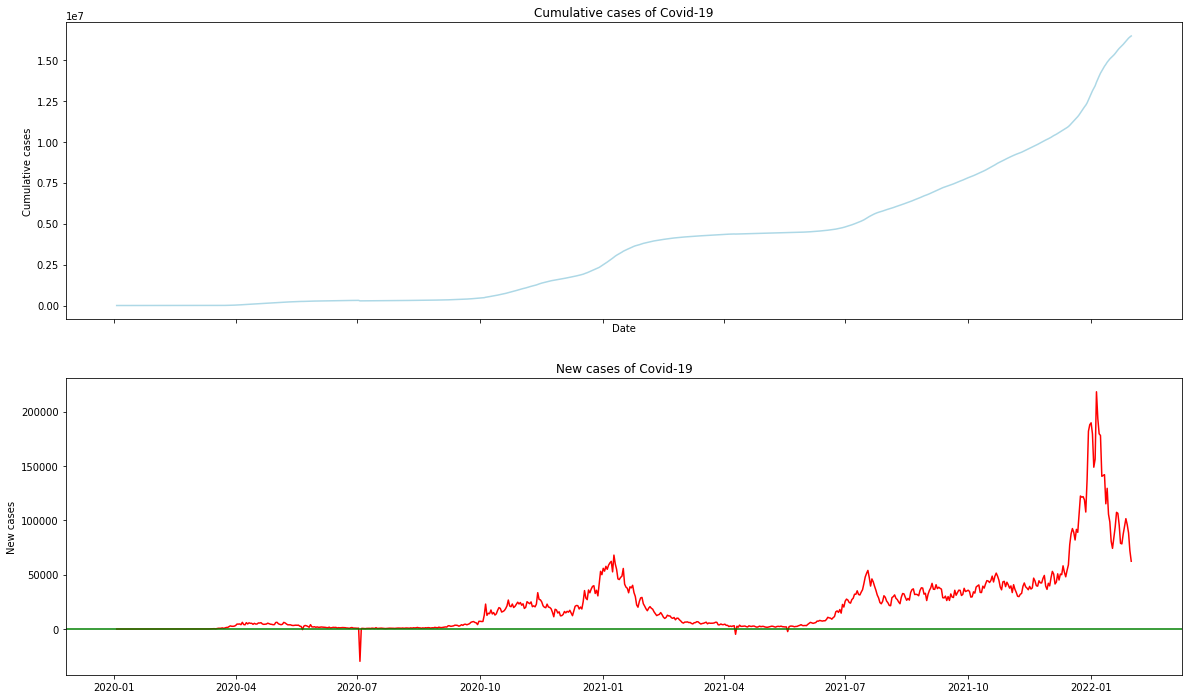

In [89]:
#Plotting the Cumulative and new cases for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_cases'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_cases'], linestyle='-', color='red')

ax[0].set_xlabel('Date')

ax[0].set_title('Cumulative cases of Covid-19')
ax[0].set_ylabel('Cumulative cases')

ax[1].set_title('New cases of Covid-19')
ax[1].set_ylabel('New cases')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()

Found negative values in new cases, which can not happen, maybe it can be the number of people recovered from covid. But we don't have enough data to produce recovered stats in all the samples. negative new cases are zeroed and cumulative cases are recalculated.

In [90]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
755,2022-01-27,GB,The United Kingdom,EURO,101603,16149323,346,154702,27,1,2022
756,2022-01-28,GB,The United Kingdom,EURO,96155,16245478,338,155040,28,1,2022
757,2022-01-29,GB,The United Kingdom,EURO,88506,16333984,277,155317,29,1,2022
758,2022-01-30,GB,The United Kingdom,EURO,72143,16406127,296,155613,30,1,2022


In [91]:
#Finding negative new cases
uk_data[uk_data['New_cases'] < 0]['New_cases'].index

Int64Index([139, 182, 463, 502], dtype='int64')

In [92]:
uk_data['New_cases'].loc[uk_data[uk_data['New_cases'] < 0]['New_cases'].index] = 0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [93]:
uk_data[uk_data['New_cases'] < 0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year


In [94]:
uk_data['cumsum'] = uk_data['New_cases'].cumsum()

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/2731571578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['cumsum'] = uk_data['New_cases'].cumsum()


In [95]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year,cumsum
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020,0
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020,0
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020,0
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020,0
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2022-01-27,GB,The United Kingdom,EURO,101603,16149323,346,154702,27,1,2022,16186798
756,2022-01-28,GB,The United Kingdom,EURO,96155,16245478,338,155040,28,1,2022,16282953
757,2022-01-29,GB,The United Kingdom,EURO,88506,16333984,277,155317,29,1,2022,16371459
758,2022-01-30,GB,The United Kingdom,EURO,72143,16406127,296,155613,30,1,2022,16443602


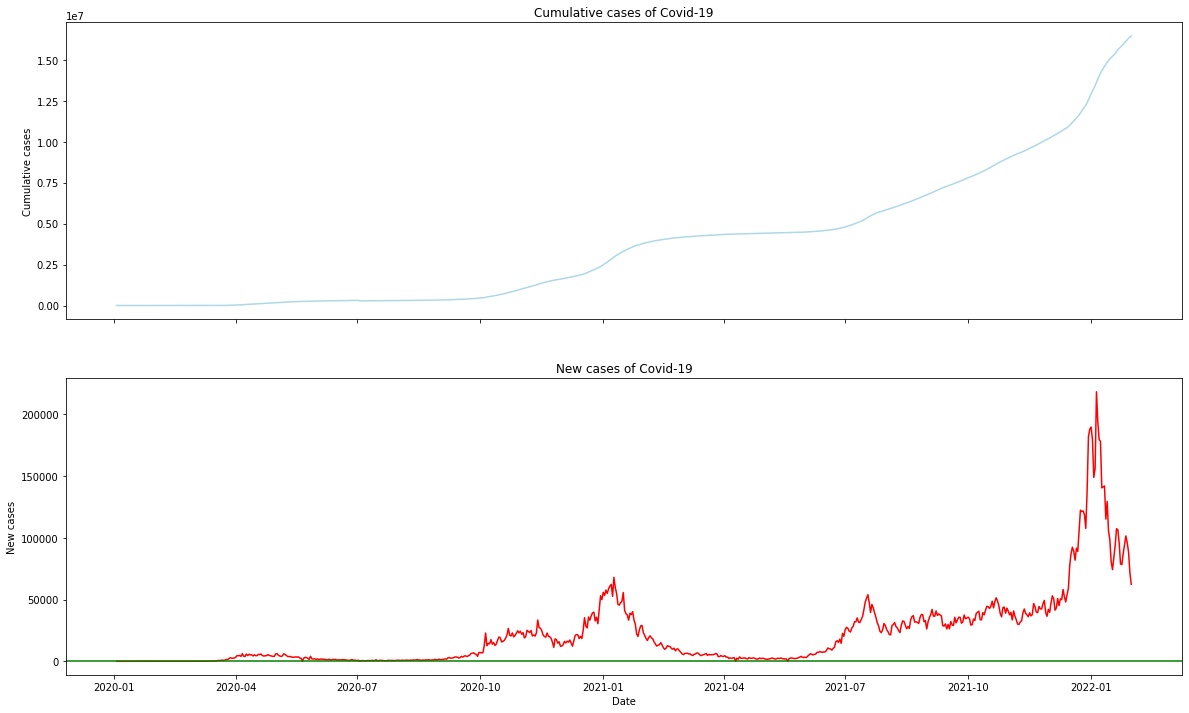

In [96]:
#Plotting the Cumulative and new cases for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_cases'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_cases'], linestyle='-', color='red')

ax[0].set_title('Cumulative cases of Covid-19')
ax[0].set_ylabel('Cumulative cases')

ax[1].set_title('New cases of Covid-19')
ax[1].set_ylabel('New cases')
ax[1].set_xlabel('Date')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()

In [97]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year,cumsum
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020,0
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020,0
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020,0
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020,0
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2022-01-27,GB,The United Kingdom,EURO,101603,16149323,346,154702,27,1,2022,16186798
756,2022-01-28,GB,The United Kingdom,EURO,96155,16245478,338,155040,28,1,2022,16282953
757,2022-01-29,GB,The United Kingdom,EURO,88506,16333984,277,155317,29,1,2022,16371459
758,2022-01-30,GB,The United Kingdom,EURO,72143,16406127,296,155613,30,1,2022,16443602


In [98]:
uk_data['Cumulative_cases'] = uk_data['cumsum']
uk_data.drop('cumsum', axis=1, inplace=True)

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_87361/4027653383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Cumulative_cases'] = uk_data['cumsum']
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
755,2022-01-27,GB,The United Kingdom,EURO,101603,16186798,346,154702,27,1,2022
756,2022-01-28,GB,The United Kingdom,EURO,96155,16282953,338,155040,28,1,2022
757,2022-01-29,GB,The United Kingdom,EURO,88506,16371459,277,155317,29,1,2022
758,2022-01-30,GB,The United Kingdom,EURO,72143,16443602,296,155613,30,1,2022


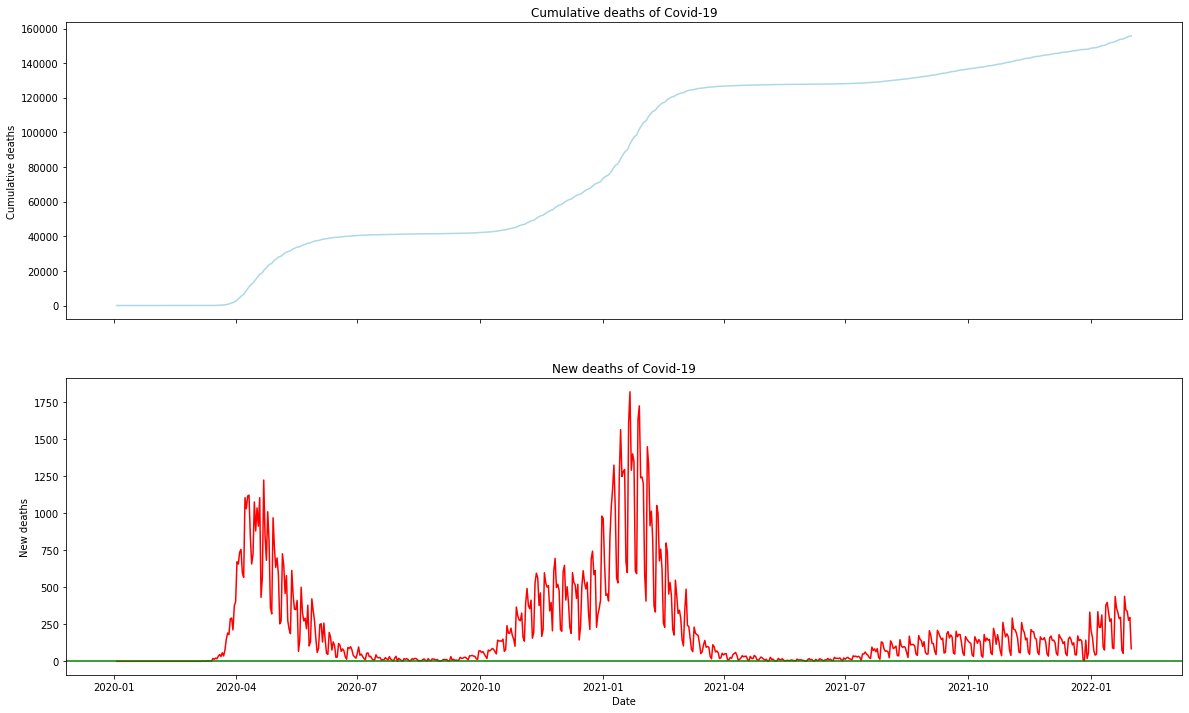

In [100]:
#Plotting the Cumulative and new deaths for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_deaths'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_deaths'], linestyle='-', color='red')

ax[0].set_title('Cumulative deaths of Covid-19')
ax[0].set_ylabel('Cumulative deaths')

ax[1].set_title('New deaths of Covid-19')
ax[1].set_ylabel('New deaths')
ax[1].set_xlabel('Date')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()

In [101]:
X = uk_data[['Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'Day', 'Month', 'Year']]
y = uk_data['New_cases']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [103]:
X_train

,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,0,0,0,3,1,2020
1,0,0,0,4,1,2020
2,0,0,0,5,1,2020
3,0,0,0,6,1,2020
4,0,0,0,7,1,2020
...,...,...,...,...,...,...
603,6703878,100,132243,28,8,2021
604,6735965,133,132376,29,8,2021
605,6768902,61,132437,30,8,2021
606,6795129,48,132485,31,8,2021


In [104]:
X_test

,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
608,6862553,207,132742,2,9,2021
609,6900383,178,132920,3,9,2021
610,6942448,121,133041,4,9,2021
611,6979090,120,133161,5,9,2021
612,7015605,68,133229,6,9,2021
...,...,...,...,...,...,...
755,16186798,346,154702,27,1,2022
756,16282953,338,155040,28,1,2022
757,16371459,277,155317,29,1,2022
758,16443602,296,155613,30,1,2022


## Model Training

### Random Forest

In [105]:
RF =RandomForestRegressor()

In [106]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
RF.score(X_test, y_test)

-0.5781254055381193

### Hyperparameter tuning

In [108]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 100)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [109]:
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=98, min_samples_split=56, n_estimators=118; total time=   0.2s
[CV] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=98, min_samples_split=56, n_estimators=118; total time=   0.2s
[CV] END bootstrap=False, max_depth=34, max_features=auto, min_samples_leaf=98, min_samples_split=56, n_estimators=118; total time=   0.2s
[CV] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=936; total time=   1.8s
[CV] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=936; total time=   1.8s
[CV] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=936; total time=   1.8s
[CV] END bootstrap=True, max_depth=73, max_features=sqrt, min_samples_leaf=53, min_samples_split=19, n_est

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                         

In [110]:
rf_random.score(X_test, y_test)

-0.30564936107496665

### Support Vector Machine

In [111]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-1.933857578708257

### Linear Regression

In [112]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.3959981617954985

In [113]:
random_grid_lm = {'fit_intercept': [True, False],
                  'normalize': [True, False],
                  'positive': [True, False]}

### Hyperparameter tuning

In [114]:
lm_random = RandomizedSearchCV(estimator = lm, param_distributions = random_grid_lm, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [115]:
lm_random.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framewor

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..fit_intercept=True, normalize=True, positive=True; total time=   0.0s
[CV] END ..fit_intercept=True, normalize=True, positive=True; total time=   0.0s
[CV] END .fit_intercept=True, normalize=True, positive=False; total time=   0.0s
[CV] END .fit_intercept=True, normalize=True, positive=False; total time=   0.0s
[CV] END ..fit_intercept=True, normalize=True, positive=True; total time=   0.1s
[CV] END .fit_intercept=True, normalize=True, positive=False; total time=   0.0s
[CV] END .fit_intercept=True, normalize=False, positive=True; total time=   0.0s
[CV] END .fit_intercept=True, normalize=False, positive=True; total time=   0.0s
[CV] END .fit_intercept=True, normalize=False, positive=True; total time=   0.0s
[CV] END fit_intercept=True, normalize=False, positive=False; total time=   0.0s
[CV] END .fit_intercept=False, normalize=True, positive=True; total time=   0.0s
[CV] END fit_intercept=True, normalize=False, pos

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_m

RandomizedSearchCV(cv=3, estimator=LinearRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'positive': [True, False]},
                   random_state=42, verbose=2)

In [116]:
lm_random.score(X_test, y_test)

-0.3086879652233201

### Observation so far
>The data is trained and tested with different models (Random Forest, Support Vector Machine, Linear Regression) either of the model performed well. it can be seen from the score. so decided to try some advanced algorithms. ARIMA is one of the advanced time series algorithm.

# Using ARIMA to solve the problem

In [117]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
0,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
1,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
2,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
3,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
4,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
755,2022-01-27,GB,The United Kingdom,EURO,101603,16186798,346,154702,27,1,2022
756,2022-01-28,GB,The United Kingdom,EURO,96155,16282953,338,155040,28,1,2022
757,2022-01-29,GB,The United Kingdom,EURO,88506,16371459,277,155317,29,1,2022
758,2022-01-30,GB,The United Kingdom,EURO,72143,16443602,296,155613,30,1,2022


In [118]:
arima_data = uk_data[['Date_reported', 'New_cases']].copy()

In [119]:
arima_data

,Date_reported,New_cases
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
755,2022-01-27,101603
756,2022-01-28,96155
757,2022-01-29,88506
758,2022-01-30,72143


In [120]:
arima_data.set_index('Date_reported', inplace=True)

In [121]:
arima_data

,New_cases
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
...,...
2022-01-27,101603
2022-01-28,96155
2022-01-29,88506


<AxesSubplot:xlabel='Date_reported'>

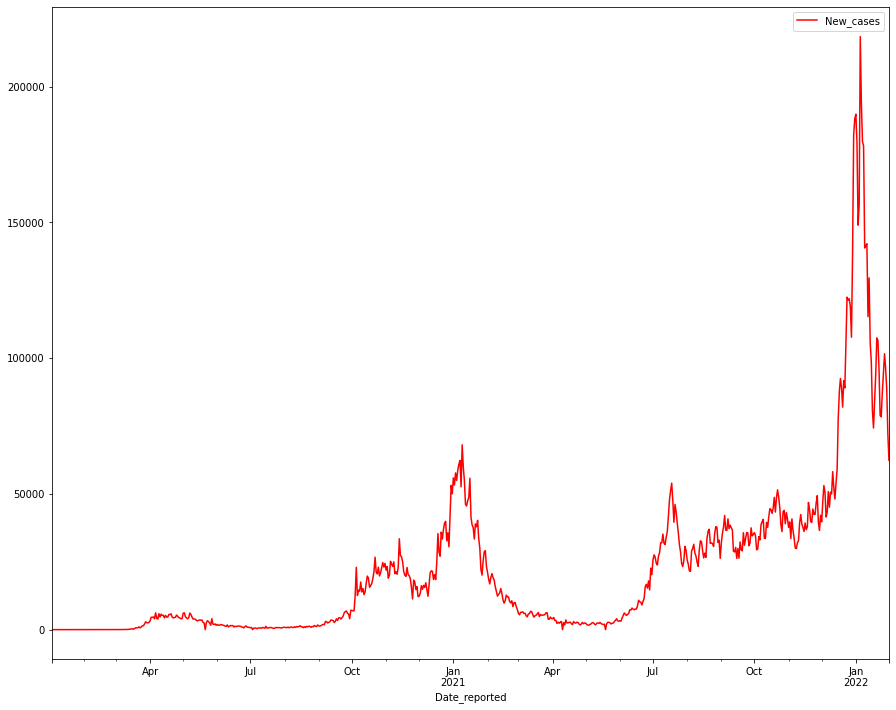

In [122]:
arima_data.plot(figsize=(15, 12), color='red')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

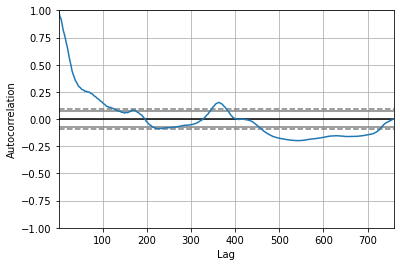

In [144]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(arima_data['New_cases'])

In [123]:
from statsmodels.tsa.stattools import adfuller

In [124]:
result = adfuller(arima_data['New_cases'])
if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [125]:
arima_data['difference'] = arima_data['New_cases'] - arima_data['New_cases'].shift(1)

In [126]:
arima_data.dropna(inplace=True)

In [127]:
result = adfuller(arima_data['difference'])
if result[1] <= 0.05:
        print(f"{result[1]} strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
        print(f"{result[1]} weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

2.657766157077037e-07 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date_reported'>

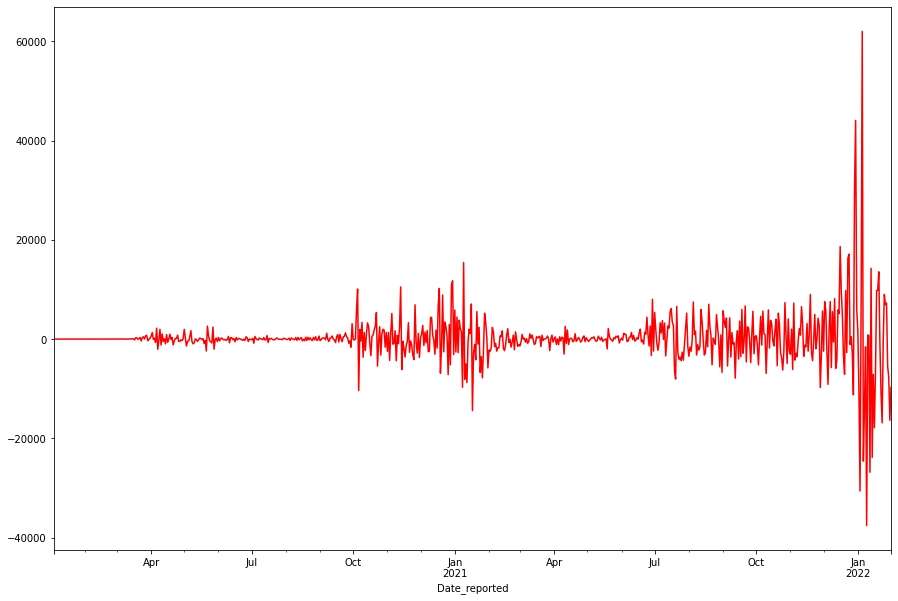

In [128]:
arima_data['difference'].plot(figsize=(15, 10), color='red')

In [129]:
arima_data['difference']

Date_reported
2020-01-04        0.0
2020-01-05        0.0
2020-01-06        0.0
2020-01-07        0.0
2020-01-08        0.0
               ...   
2022-01-27     7277.0
2022-01-28    -5448.0
2022-01-29    -7649.0
2022-01-30   -16363.0
2022-01-31    -9744.0
Name: difference, Length: 759, dtype: float64

In [150]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(arima_data['New_cases'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15076.021, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15122.855, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15123.709, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15123.375, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15121.046, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15100.899, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15112.250, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15097.288, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14974.937, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15101.668, Time=0.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14969.546, Time=0.68 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=14941.005, Time=1.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=14998.534, Time=0.71 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=14869.392, Time=1.16 sec
 ARIMA(5,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  759
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -7421.004
Date:                Tue, 01 Feb 2022   AIC                          14866.007
Time:                        19:06:50   BIC                          14921.575
Sample:                             0   HQIC                         14887.408
                                - 759                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    101.0961    116.494      0.868      0.385    -127.229     329.421
ar.L1          1.1197      0.056     20.160      0.000       1.011       1.229
ar.L2         -0.8860      0.081    -10.910      0.000      -1.045      -0.727
ar.L3          0.4791      0.086      5.548      0.000       0.310       0.648
ar.L4         -0.6524      0.046    -14.054      0.000      -0.743      -0.561
ar.L5          0.4971      0.032     15.772      0.000       0.435       0.559
ma.L1         -1.2459      0.055    -22.712      0.000      -1.353      -1.138
ma.L2          0.9330      0.097      9.643      0.000       0.743       1.123
ma.L3         -0.3428      0.110     -3.118      0.002      -0.558      -0.127
ma.L4          0.3558      0.080      4.473      0.000       0.200       0.512
ma.L5         -0.1114      0.045     -2.487      0.013      -0.199      -0.024
sigma2      1.956e+07      0.002   8.84e+09      0.000    1.96e+07    1.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             16846.87
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             135.53   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.27e+25. Standard errors may be unstable.
"""

In [151]:
model = ARIMA(arima_data['New_cases'], order=(5,1,5))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

In [152]:
output = model_fit.forecast(steps=10)

In [158]:
arima_data['New_cases'].tail()

Date_reported
2022-01-27    101603
2022-01-28     96155
2022-01-29     88506
2022-01-30     72143
2022-01-31     62399
Name: New_cases, dtype: int64

In [188]:
output = model_fit.forecast(steps=28)

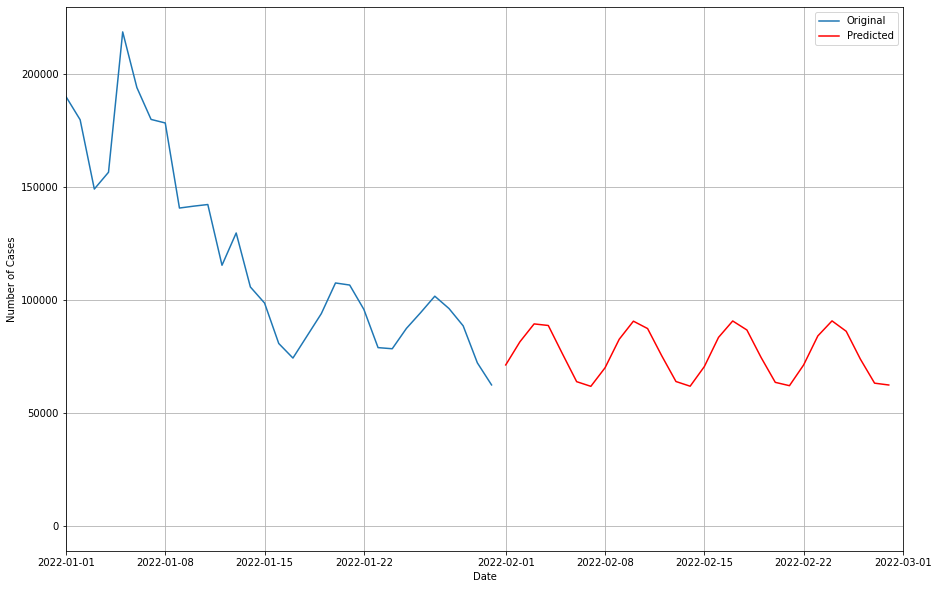

In [190]:

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')

ax.plot(arima_data['New_cases'], label='Original')
ax.plot(output, color='red', label='Predicted')
ax.set_xlim([datetime.date(2022, 1, 1), datetime.date(2022, 3, 1)])
ax.legend()
ax.grid()